In [1]:
import plotly.express as px
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

In [60]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [36]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [69]:
for col in data.columns:
    print(col)
    print()
    print(data[col].value_counts(normalize=True)*100)
    print('= - ='*20)
    print()

Gender

0    54.07613
1    45.92387
Name: Gender, dtype: float64
= - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - =

Age

24    6.811700
23    6.364583
22    5.500788
25    5.414724
21    4.318187
        ...   
81    0.014694
82    0.007609
83    0.005773
84    0.002886
85    0.002886
Name: Age, Length: 66, dtype: float64
= - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - =

Driving_License

1    99.786938
0     0.213062
Name: Driving_License, dtype: float64
= - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - =

Region_Code

28.0    27.922458
8.0      8.889058
46.0     5.181982
41.0     4.792067
15.0     3.491914
30.0     3.198822
29.0     2.903369
50.0     2.687683
3.0      2.427390
11.0     2.422404
36.0     2.308264
33.0     2.008349
47.0     1.951148
35.0     1.821526
6.0      1.647823
45.0     1.470708
37.0     1.443419
18.0     1.352107

In [113]:
data.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,0,40454.0,26.0,217,1


### ***Process***

In [3]:
def process(df):
    df.drop(columns=['id','Gender','Driving_License'],inplace = True)  # Driving_license = 1 for most of the data, Gender is neither affecting  response nor avg premuim 
    df['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year' :1,'> 2 Years':2},inplace = True)
    df['Vehicle_Damage'].replace({'Yes':0,'No':1},inplace=True)


In [4]:
process(data)

In [5]:
numerical_cols = ['Age','Annual_Premium','Vintage']
categorical_cols = list(set(data.columns) - set(numerical_cols))

In [6]:
from scipy.stats import zscore
for col in numerical_cols:
    data[col] = data[col].astype('float')
    data[col] = zscore(data[col])

for col in categorical_cols:
    data[col] = data[col].astype('object')

In [176]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
# Replacing Some Policy channel to others(0), So that we can reduce features.
policy_channels_having_less_counts = data['Policy_Sales_Channel'].value_counts().index[data['Policy_Sales_Channel'].value_counts().values < 200].values
data['Policy_Sales_Channel'].replace(policy_channels_having_less_counts,0,inplace = True)

In [8]:
X_ = data.drop(columns = 'Response')
X = pd.get_dummies(X_)

Y = data['Response']
Y = Y.astype('int64')

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_, Y, random_state = 0)

### Treating Imbalaced Data

#### UpSampling

In [14]:
from imblearn.over_sampling import SMOTENC

In [33]:
data.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.333777,28,0,2,0,0.574539,26,0.748795,1
1,2.396751,3,0,1,1,0.172636,26,0.342443,0
2,0.527181,28,0,2,0,0.449053,26,-1.521998,1
3,-1.148985,11,1,0,1,-0.113018,152,0.581474,0
4,-0.633242,41,1,0,1,-0.178259,152,-1.378580,0


In [21]:
sm = SMOTENC(random_state=42, categorical_features = [1,2,3,4,6], n_jobs=3)
X_up, y_up = sm.fit_resample(x_train, y_train)

In [22]:
X_up.shape

(501592, 8)

In [23]:
y_up.value_counts()

1    250796
0    250796
Name: Response, dtype: int64

#### DownSampling

In [29]:
from imblearn.under_sampling import TomekLinks,NearMiss

In [30]:
tl = NearMiss(n_jobs=3)
X_down, y_down = tl.fit_resample(x_train, y_train)

In [31]:
X_down.shape

(70070, 8)

In [32]:
y_down.value_counts()

1    35035
0    35035
Name: Response, dtype: int64

### Feature Selection

[link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [83]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_, Y)

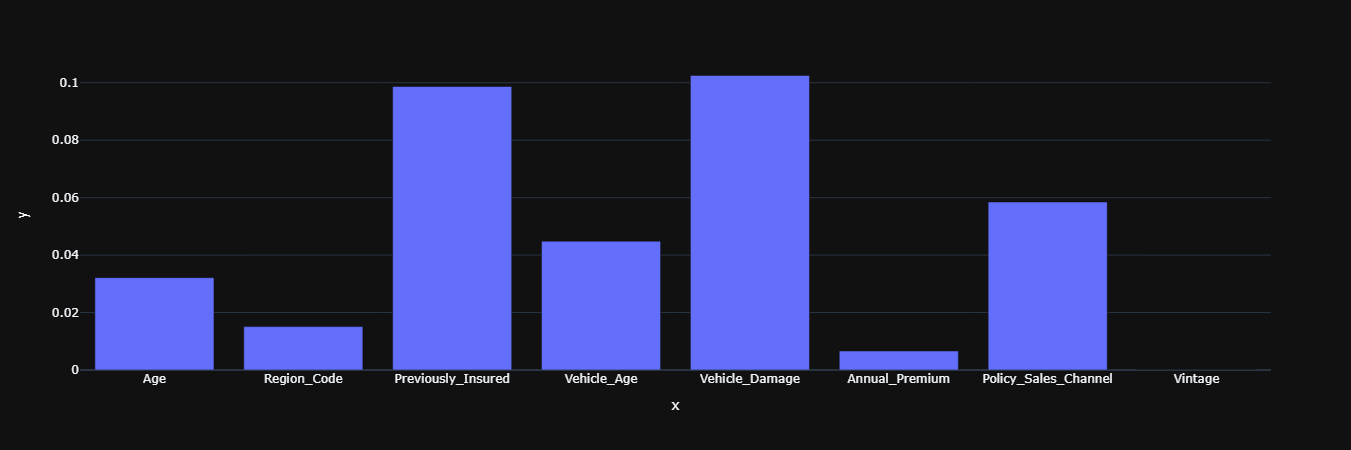

In [84]:
fig = px.bar(x = X_up.columns, y =fs.scores_, template = 'plotly_dark')
fig.show()

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_up, y_up)   # over sample

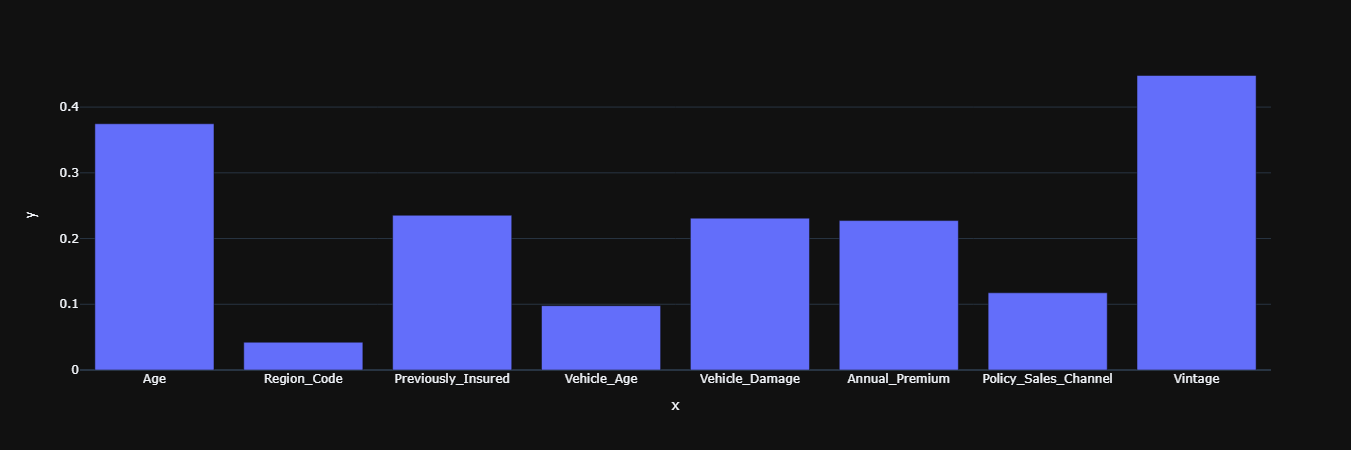

In [73]:
fig = px.bar(x = X_up.columns, y =fs.scores_, template = 'plotly_dark')
fig.show()

In [74]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_down, y_down) # down sample

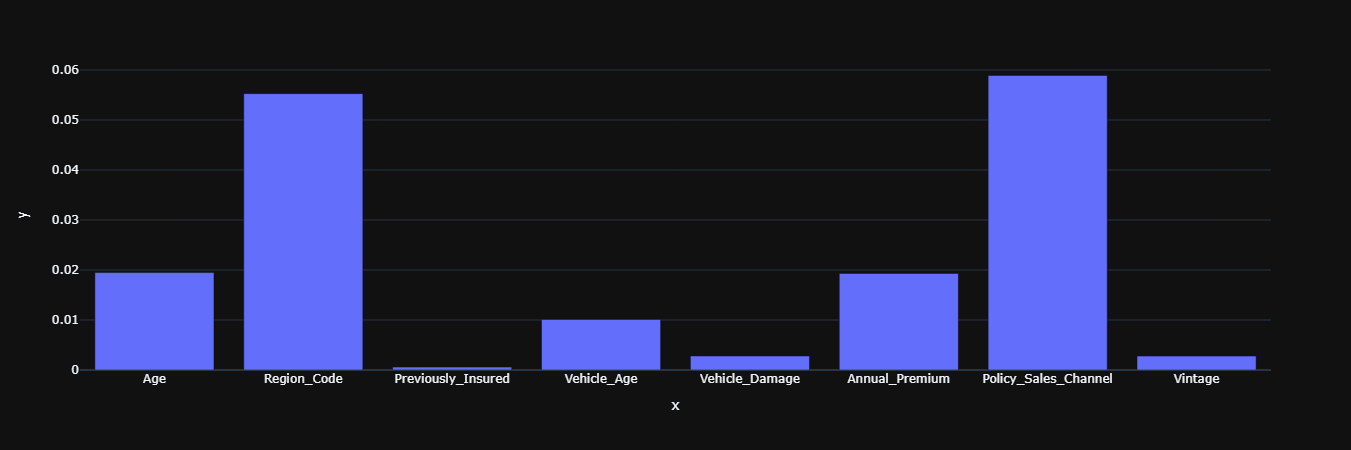

In [77]:
fig = px.bar(x = X_up.columns, y =fs.scores_, template = 'plotly_dark')
fig.show()

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.metrics import classification_report,hamming_loss,roc_auc_score,confusion_matrix

In [74]:
def base_estimator(x_train, x_test, y_train, y_test,est = LogisticRegression):
#     x_train, x_test, y_train, y_test = train_test_split(data_X,data_Y,random_state = 0)
    
    mod = est(random_state=0,n_jobs = 3)
    mod.fit(x_train.values, y_train.values)
    
    y_train_predict = mod.predict(x_train)
    y_test_predict = mod.predict(x_test)
    
    print(classification_report(y_train,y_train_predict))
    prob = mod.predict_proba(x_train)
    print(f'auc_roc_score : {roc_auc_score(y_train,prob[:,1])}')
    
    print('-'*50)
    print(classification_report(y_test,y_test_predict))
    prob = mod.predict_proba(x_test)
    print(f'auc_roc_score : {roc_auc_score(y_test,prob[:,1])}')

In [26]:
base_estimator(x_train, x_test, y_train, y_test, LogisticRegression)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250796
           1       0.29      0.00      0.00     35035

    accuracy                           0.88    285831
   macro avg       0.58      0.50      0.47    285831
weighted avg       0.81      0.88      0.82    285831

auc_roc_score : 0.8313889532486093
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.45      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.66      0.50      0.47     95278
weighted avg       0.83      0.88      0.82     95278

auc_roc_score : 0.8303274543619673


In [75]:
base_estimator(X_up, x_test, y_up, y_test, LogisticRegression)

              precision    recall  f1-score   support

           0       0.97      0.59      0.74    250796
           1       0.71      0.98      0.82    250796

    accuracy                           0.79    501592
   macro avg       0.84      0.79      0.78    501592
weighted avg       0.84      0.79      0.78    501592

auc_roc_score : 0.8328464579185144
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     83603
           1       0.25      0.98      0.40     11675

    accuracy                           0.64     95278
   macro avg       0.62      0.78      0.57     95278
weighted avg       0.90      0.64      0.70     95278

auc_roc_score : 0.8296287539859345


In [28]:
base_estimator(pd.get_dummies(X_up), pd.get_dummies(x_test), y_up, y_test, LogisticRegression)

              precision    recall  f1-score   support

           0       0.94      0.62      0.75    250796
           1       0.72      0.96      0.82    250796

    accuracy                           0.79    501592
   macro avg       0.83      0.79      0.79    501592
weighted avg       0.83      0.79      0.79    501592

auc_roc_score : 0.8486581311588535
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     83603
           1       0.26      0.95      0.40     11675

    accuracy                           0.66     95278
   macro avg       0.62      0.78      0.58     95278
weighted avg       0.90      0.66      0.72     95278

auc_roc_score : 0.8382787535082511


In [34]:
base_estimator(pd.get_dummies(X_up.drop(columns = 'Region_Code')), pd.get_dummies(x_test.drop(columns = 'Region_Code')), y_up, y_test, LogisticRegression)

              precision    recall  f1-score   support

           0       0.97      0.59      0.74    250796
           1       0.71      0.98      0.82    250796

    accuracy                           0.79    501592
   macro avg       0.84      0.79      0.78    501592
weighted avg       0.84      0.79      0.78    501592

auc_roc_score : 0.8382919281904294
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     83603
           1       0.25      0.97      0.40     11675

    accuracy                           0.64     95278
   macro avg       0.62      0.78      0.57     95278
weighted avg       0.90      0.64      0.70     95278

auc_roc_score : 0.8343338124424651


In [112]:
from sklearn.model_selection import GridSearchCV

#logistic
log_params = {"penalty": ['l2'], 
              'C': [ 0.5, 0.01, 0.1, 1, 2],
             'solver' : ['newton-cg', 'lbfgs', 'sag'],
             'max_iter': [300]}

grid_log = GridSearchCV(LogisticRegression(), log_params, n_jobs=3, cv = 5,return_train_score=True, scoring = 'f1_weighted')
grid_log.fit(X_up, y_up)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.5, 0.01, 0.1, 1, 2], 'max_iter': [300],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             return_train_score=True, scoring='f1_weighted')

In [113]:
grid_log.best_params_

{'C': 2, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}

In [115]:
# pd.DataFrame(grid_log.cv_results_).sort_values(by = 'rank_test_score')

In [116]:
model = LogisticRegression(random_state=0,n_jobs = -1,C=2, max_iter=300,penalty = 'l2', solver = 'lbfgs')
model.fit(X_up, y_up)

LogisticRegression(C=2, max_iter=300, n_jobs=-1, random_state=0)

In [121]:
x_train = X_up
# x_test = pd.get_dummies(x_test)
y_train = y_up

y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

print(classification_report(y_train,y_train_predict))
prob = model.predict_proba(x_train)
print(f'auc_roc_score : {roc_auc_score(y_train,prob[:,1])}')

print('-'*50)
print(classification_report(y_test,y_test_predict))
prob = model.predict_proba(x_test)
print(f'auc_roc_score : {roc_auc_score(y_test,prob[:,1])}')

              precision    recall  f1-score   support

           0       0.97      0.59      0.74    250796
           1       0.71      0.98      0.82    250796

    accuracy                           0.79    501592
   macro avg       0.84      0.79      0.78    501592
weighted avg       0.84      0.79      0.78    501592

auc_roc_score : 0.833784796744129
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     83603
           1       0.25      0.98      0.40     11675

    accuracy                           0.64     95278
   macro avg       0.62      0.78      0.57     95278
weighted avg       0.90      0.64      0.70     95278

auc_roc_score : 0.830170133900659


#### RF

In [35]:
base_estimator(x_train, x_test, y_train, y_test, RandomForestClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250796
           1       1.00      1.00      1.00     35035

    accuracy                           1.00    285831
   macro avg       1.00      1.00      1.00    285831
weighted avg       1.00      1.00      1.00    285831

auc_roc_score : 0.9999988657777686
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.13      0.19     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.55      0.56     95278
weighted avg       0.82      0.87      0.84     95278

auc_roc_score : 0.8332576413133952


In [70]:
base_estimator(X_up.drop(columns = 'Region_Code'), x_test.drop(columns = 'Region_Code'), y_up, y_test, RandomForestClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250796
           1       1.00      1.00      1.00    250796

    accuracy                           1.00    501592
   macro avg       1.00      1.00      1.00    501592
weighted avg       1.00      1.00      1.00    501592

auc_roc_score : 0.9999689852404123
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     83603
           1       0.31      0.44      0.37     11675

    accuracy                           0.81     95278
   macro avg       0.61      0.65      0.63     95278
weighted avg       0.84      0.81      0.83     95278

auc_roc_score : 0.8242241663151492


In [72]:
base_estimator(X_up, x_test, y_up, y_test, RandomForestClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250796
           1       1.00      1.00      1.00    250796

    accuracy                           1.00    501592
   macro avg       1.00      1.00      1.00    501592
weighted avg       1.00      1.00      1.00    501592

auc_roc_score : 0.9999997541282043
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     83603
           1       0.32      0.44      0.37     11675

    accuracy                           0.82     95278
   macro avg       0.62      0.66      0.63     95278
weighted avg       0.85      0.82      0.83     95278

auc_roc_score : 0.8323185804142504


In [71]:
base_estimator(X_down, x_test, y_down, y_test, RandomForestClassifier) #down sample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35035
           1       1.00      1.00      1.00     35035

    accuracy                           1.00     70070
   macro avg       1.00      1.00      1.00     70070
weighted avg       1.00      1.00      1.00     70070

auc_roc_score : 0.9999920241229951
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.14      0.24     83603
           1       0.10      0.66      0.17     11675

    accuracy                           0.20     95278
   macro avg       0.42      0.40      0.20     95278
weighted avg       0.67      0.20      0.23     95278

auc_roc_score : 0.3050287694715831


In [37]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

#### GB

In [41]:
base_estimator(x_train, x_test, y_train, y_test, GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250796
           1       0.79      0.00      0.00     35035

    accuracy                           0.88    285831
   macro avg       0.83      0.50      0.47    285831
weighted avg       0.87      0.88      0.82    285831

auc_roc_score : 0.8564616950652385
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.75      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.81      0.50      0.47     95278
weighted avg       0.86      0.88      0.82     95278

auc_roc_score : 0.8563075098403408


In [68]:
base_estimator(pd.get_dummies(X_up), pd.get_dummies(x_test), y_up, y_test, GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79    250796
           1       0.75      0.96      0.84    250796

    accuracy                           0.82    501592
   macro avg       0.85      0.82      0.82    501592
weighted avg       0.85      0.82      0.82    501592

auc_roc_score : 0.8949929463281714
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     83603
           1       0.28      0.91      0.43     11675

    accuracy                           0.70     95278
   macro avg       0.63      0.79      0.61     95278
weighted avg       0.90      0.70      0.75     95278

auc_roc_score : 0.8499625657624603


In [45]:
base_estimator(X_up.drop(columns = 'Region_Code'), x_test.drop(columns = 'Region_Code'), y_up, y_test, GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79    250796
           1       0.75      0.96      0.84    250796

    accuracy                           0.82    501592
   macro avg       0.85      0.82      0.82    501592
weighted avg       0.85      0.82      0.82    501592

auc_roc_score : 0.9034368057487503
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     83603
           1       0.29      0.90      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278

auc_roc_score : 0.8493072851370738


In [42]:
base_estimator(pd.get_dummies(X_up.drop(columns = 'Region_Code')), pd.get_dummies(x_test.drop(columns = 'Region_Code')), y_up, y_test, GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.94      0.69      0.80    250796
           1       0.75      0.96      0.84    250796

    accuracy                           0.82    501592
   macro avg       0.85      0.82      0.82    501592
weighted avg       0.85      0.82      0.82    501592

auc_roc_score : 0.8981932218576671
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     83603
           1       0.29      0.90      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278

auc_roc_score : 0.8486645912755659


In [69]:
base_estimator(X_down, x_test, y_down, y_test, GradientBoostingClassifier) #down sample

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     35035
           1       0.77      0.62      0.69     35035

    accuracy                           0.72     70070
   macro avg       0.72      0.72      0.71     70070
weighted avg       0.72      0.72      0.71     70070

auc_roc_score : 0.7793639845037427
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.17      0.27     83603
           1       0.09      0.62      0.16     11675

    accuracy                           0.22     95278
   macro avg       0.43      0.39      0.22     95278
weighted avg       0.68      0.22      0.26     95278

auc_roc_score : 0.2939453050271933


#### AB

In [43]:
base_estimator(x_train, x_test, y_train, y_test, AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    250796
           1       0.00      0.00      0.00     35035

    accuracy                           0.88    285831
   macro avg       0.44      0.50      0.47    285831
weighted avg       0.77      0.88      0.82    285831

auc_roc_score : 0.8519421088329684
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

auc_roc_score : 0.8529345496218349


In [67]:
base_estimator(pd.get_dummies(X_up), pd.get_dummies(x_test), y_up, y_test, AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.93      0.68      0.79    250796
           1       0.75      0.95      0.84    250796

    accuracy                           0.82    501592
   macro avg       0.84      0.82      0.81    501592
weighted avg       0.84      0.82      0.81    501592

auc_roc_score : 0.8682189079240745
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     83603
           1       0.28      0.91      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.90      0.71      0.76     95278

auc_roc_score : 0.8485288462210804


In [44]:
base_estimator(pd.get_dummies(X_up.drop(columns = 'Region_Code')), pd.get_dummies(x_test.drop(columns = 'Region_Code')), y_up, y_test, AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.93      0.68      0.79    250796
           1       0.75      0.95      0.84    250796

    accuracy                           0.82    501592
   macro avg       0.84      0.82      0.81    501592
weighted avg       0.84      0.82      0.81    501592

auc_roc_score : 0.8660095483162268
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     83603
           1       0.28      0.90      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278

auc_roc_score : 0.8479186855404434
